# Importing necessary library

In [1]:
# import necessary librearies

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import datetime

import warnings
warnings.filterwarnings('ignore')

## import dataset

In [2]:
# read dataset
df=pd.read_csv(r"loan.csv")

In [3]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
df.shape

(39717, 111)

In [5]:
df.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

### Data Cleaning and manipulation

In [6]:
#find the percentage of null value in each columns
100*df.isnull().mean()

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

In [7]:
# removing the columns which has more than 40% null values
df=df.dropna(thresh=df.shape[0]*0.6,axis=1)

In [8]:
# Verify the selected columns title
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [9]:
#grouping unwanted columns based on it's nature and vlaues
extra_cols =["id","member_id","emp_title","pymnt_plan","url", 'desc', 'title', 'zip_code', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'application_type',
 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens','last_pymnt_d','last_pymnt_amnt', 'last_credit_pull_d']

In [10]:
#removing unwanted columns
df=df.drop(extra_cols, axis=1)

In [11]:
df.shape

(39717, 35)

In [12]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,...,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,...,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,...,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,...,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,0.0
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,...,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,0.0


In [13]:
#find the percentage of null value in selected columns
100*df.isnull().mean()

loan_amnt                  0.000000
funded_amnt                0.000000
funded_amnt_inv            0.000000
term                       0.000000
int_rate                   0.000000
installment                0.000000
grade                      0.000000
sub_grade                  0.000000
emp_length                 2.706650
home_ownership             0.000000
annual_inc                 0.000000
verification_status        0.000000
issue_d                    0.000000
loan_status                0.000000
purpose                    0.000000
addr_state                 0.000000
dti                        0.000000
delinq_2yrs                0.000000
earliest_cr_line           0.000000
inq_last_6mths             0.000000
open_acc                   0.000000
pub_rec                    0.000000
revol_bal                  0.000000
revol_util                 0.125891
total_acc                  0.000000
out_prncp                  0.000000
out_prncp_inv              0.000000
total_pymnt                0

In [14]:
# removed characters and % for calculations
df['int_rate']= df['int_rate'].str.rstrip('%')
df['emp_length']= df['emp_length'].astype('str').str.extract('(\d+)')
df['revol_util']= df['revol_util'].str.rstrip('%')

In [15]:
df['int_rate'].value_counts()

10.99    956
13.49    826
11.49    825
7.51     787
7.88     725
        ... 
18.36      1
16.96      1
16.15      1
16.01      1
17.44      1
Name: int_rate, Length: 371, dtype: int64

In [16]:
df['emp_length'].value_counts()

10    8879
1     7823
2     4388
3     4095
4     3436
5     3282
6     2229
7     1773
8     1479
9     1258
Name: emp_length, dtype: int64

In [17]:
df['revol_util'].value_counts()

0        977
0.20      63
63        62
40.70     58
66.70     58
        ... 
25.74      1
47.36      1
24.65      1
10.61      1
7.28       1
Name: revol_util, Length: 1089, dtype: int64

In [18]:
df.dtypes

loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                        object
int_rate                    object
installment                float64
grade                       object
sub_grade                   object
emp_length                  object
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
purpose                     object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
inq_last_6mths               int64
open_acc                     int64
pub_rec                      int64
revol_bal                    int64
revol_util                  object
total_acc                    int64
out_prncp                  float64
out_prncp_inv              float64
total_pymnt                float64
total_pymnt_inv     

In [19]:
#Convert object type to numeric
con_cols=['int_rate','emp_length','revol_util']
df[con_cols]=df[con_cols].apply(pd.to_numeric)

In [20]:
df.dtypes

loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                        object
int_rate                   float64
installment                float64
grade                       object
sub_grade                   object
emp_length                 float64
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
purpose                     object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
inq_last_6mths               int64
open_acc                     int64
pub_rec                      int64
revol_bal                    int64
revol_util                 float64
total_acc                    int64
out_prncp                  float64
out_prncp_inv              float64
total_pymnt                float64
total_pymnt_inv     

In [21]:
# replacing null values as median value
med=df['emp_length'].median()
df['emp_length']=df['emp_length'].fillna(med)
med1=df['int_rate'].median()
df['int_rate']=df['int_rate'].fillna(med1)
med2=df['revol_util'].median()
df['revol_util']=df['revol_util'].fillna(med2)

In [22]:
df['pub_rec_bankruptcies'].value_counts()

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [23]:
# replacing null values as 0
df['pub_rec_bankruptcies']=df['pub_rec_bankruptcies'].fillna(0)

In [24]:
100*df.isnull().mean()

loan_amnt                  0.0
funded_amnt                0.0
funded_amnt_inv            0.0
term                       0.0
int_rate                   0.0
installment                0.0
grade                      0.0
sub_grade                  0.0
emp_length                 0.0
home_ownership             0.0
annual_inc                 0.0
verification_status        0.0
issue_d                    0.0
loan_status                0.0
purpose                    0.0
addr_state                 0.0
dti                        0.0
delinq_2yrs                0.0
earliest_cr_line           0.0
inq_last_6mths             0.0
open_acc                   0.0
pub_rec                    0.0
revol_bal                  0.0
revol_util                 0.0
total_acc                  0.0
out_prncp                  0.0
out_prncp_inv              0.0
total_pymnt                0.0
total_pymnt_inv            0.0
total_rec_prncp            0.0
total_rec_int              0.0
total_rec_late_fee         0.0
recoveri

In [25]:
df.shape

(39717, 35)

## Univarient Analysis

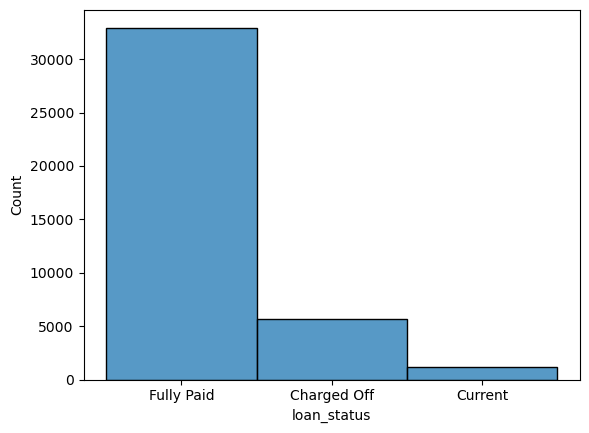

In [26]:
#study about loan status

sns.histplot(x=df['loan_status'])
plt.show()

In [27]:
#study about loan status in percentage

df['loan_status'].value_counts()*100/len(df)

#observed 83% loan in fully paid status
#observed 14% loan in charged off status
#observed ~3% loan in current status

Fully Paid     82.961956
Charged Off    14.167737
Current         2.870307
Name: loan_status, dtype: float64

In [28]:
#study the purpose of loan in percentage

df['purpose'].value_counts() * 100 / len(df)

# Observed loans most borrowed for debt consolidation, credit card and others


debt_consolidation    46.934562
credit_card           12.916383
other                 10.053629
home_improvement       7.493013
major_purchase         5.506458
small_business         4.602563
car                    3.900093
wedding                2.384369
medical                1.744845
moving                 1.467885
vacation               0.959287
house                  0.959287
educational            0.818289
renewable_energy       0.259335
Name: purpose, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

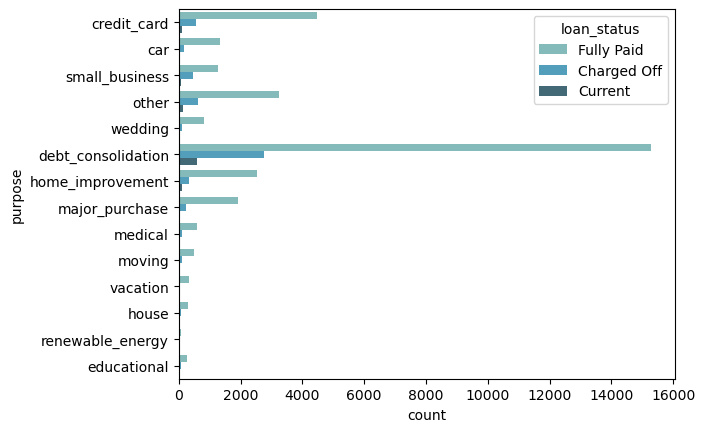

In [29]:
#study about purpose loan with respect loan status group

sns.countplot(y=df["purpose"], hue=df['loan_status'], palette='GnBu_d')
plt.show

# Observed more number of applicants borrows loan for debt consolidation, credit card and other reasons.


In [30]:
#study about loan amount

df['loan_amnt'].describe()

count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

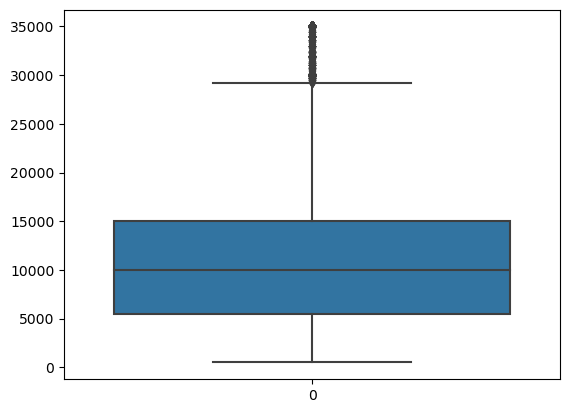

In [31]:
sns.boxplot(df['loan_amnt'])
plt.show()

# Most of loan amounts falls between 5000 to 15000

In [32]:
# study about annual income

df['annual_inc'].describe()

# noticed outliers.

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

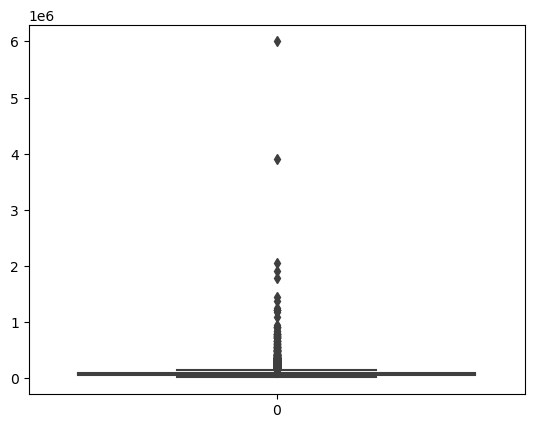

In [33]:
sns.boxplot(df['annual_inc'])
plt.show()

# noticed outliers.

In [34]:
# remove outliers

df=df[df['annual_inc'] < df["annual_inc"].quantile(0.9)]
df['annual_inc'].describe()

count     35740.000000
mean      57387.003107
std       23644.470090
min        4000.000000
25%       39996.000000
50%       54996.000000
75%       74000.000000
max      115956.000000
Name: annual_inc, dtype: float64

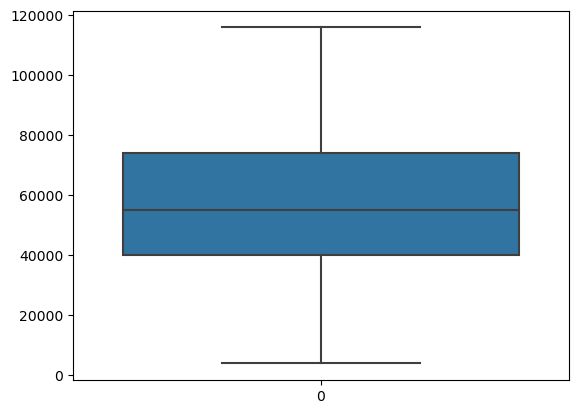

In [35]:
sns.boxplot(df['annual_inc'])
plt.show()

# Observed annual income density lies between 40000 to 74000

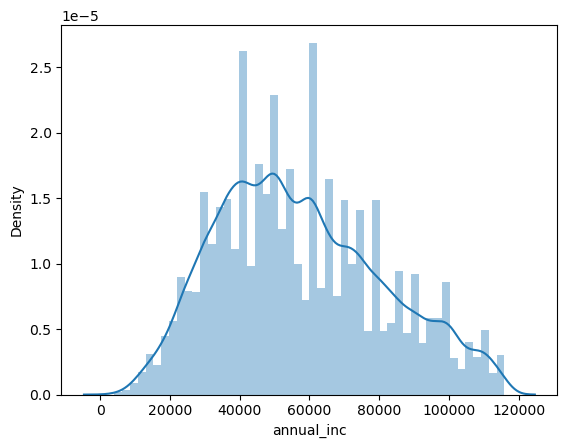

In [36]:
sns.distplot(df['annual_inc'])
plt.show()

# Observed annual income various between 20000 to 80000 mostly

In [37]:
# verify the impact of loan status after removing outliers.

df['loan_status'].value_counts()*100/len(df)

# There are no impact on loan status after removing outliers rows.

Fully Paid     82.669278
Charged Off    14.549524
Current         2.781198
Name: loan_status, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

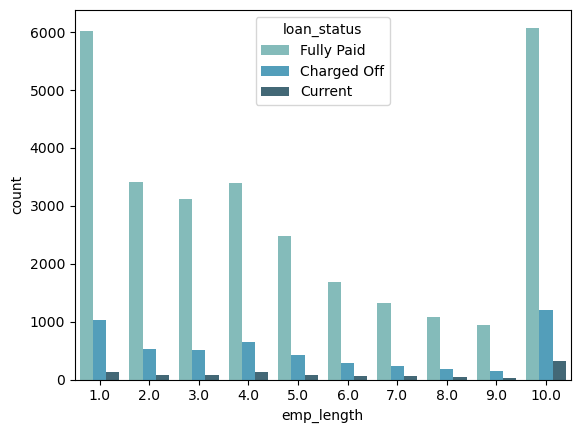

In [38]:
sns.countplot(x=df["emp_length"],hue=df['loan_status'], palette='GnBu_d')
plt.show

# Charged off customers are avaialble on each employee experience categories.

<function matplotlib.pyplot.show(close=None, block=None)>

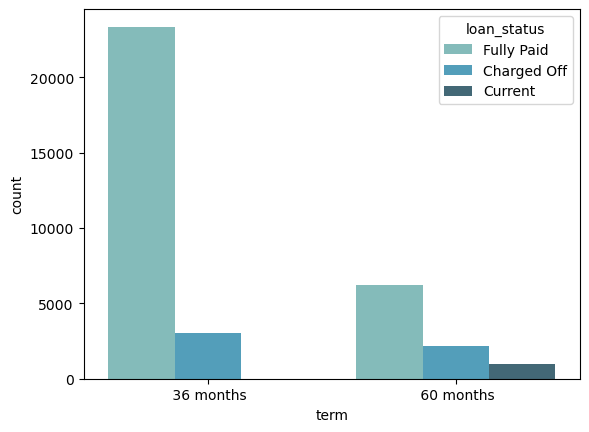

In [39]:
sns.countplot(x=df["term"], hue=df['loan_status'], palette='GnBu_d')
plt.show

# observed higher the loan term, high chances for defaulters

<function matplotlib.pyplot.show(close=None, block=None)>

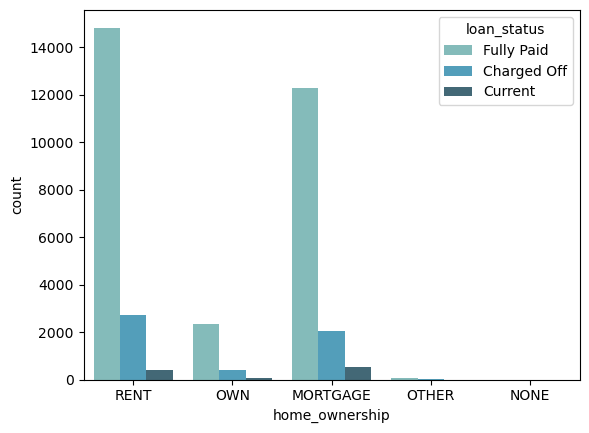

In [40]:
sns.countplot(x=df["home_ownership"], hue=df['loan_status'], palette='GnBu_d')
plt.show

# Observed high number of loan applicants are not owning homes, they are renting or mortgaging.

<function matplotlib.pyplot.show(close=None, block=None)>

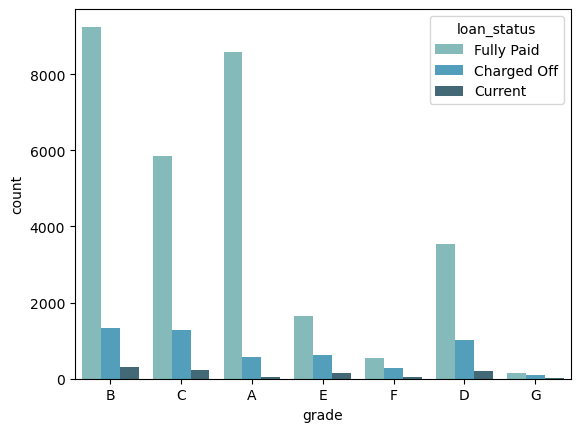

In [41]:
sns.countplot(x=df["grade"], hue=df['loan_status'], palette='GnBu_d')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

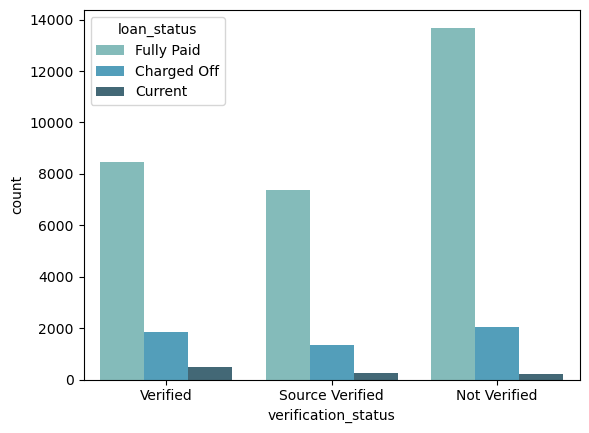

In [42]:
sns.countplot(x=df["verification_status"], hue=df['loan_status'], palette='GnBu_d')
plt.show

#Observed charged off applicants are avilable on all verficication status.

<function matplotlib.pyplot.show(close=None, block=None)>

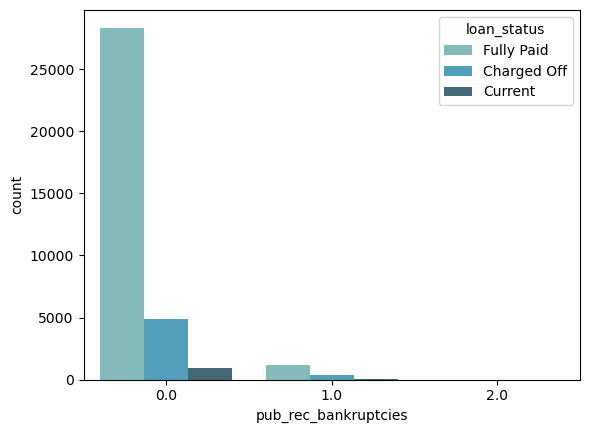

In [43]:
sns.countplot(x=df["pub_rec_bankruptcies"], hue=df['loan_status'], palette='GnBu_d')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

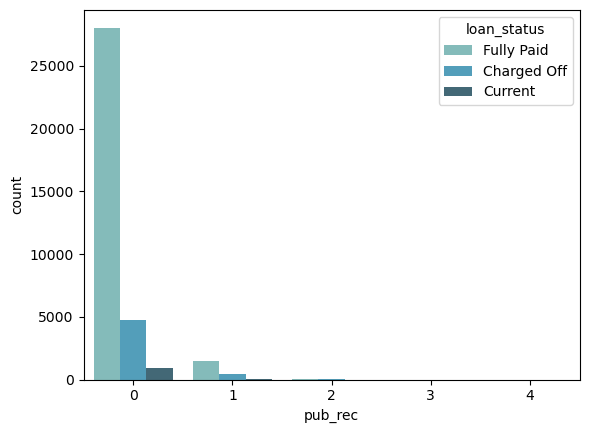

In [44]:
sns.countplot(x=df["pub_rec"], hue=df['loan_status'], palette='GnBu_d')
plt.show

### Bivariant Analysis

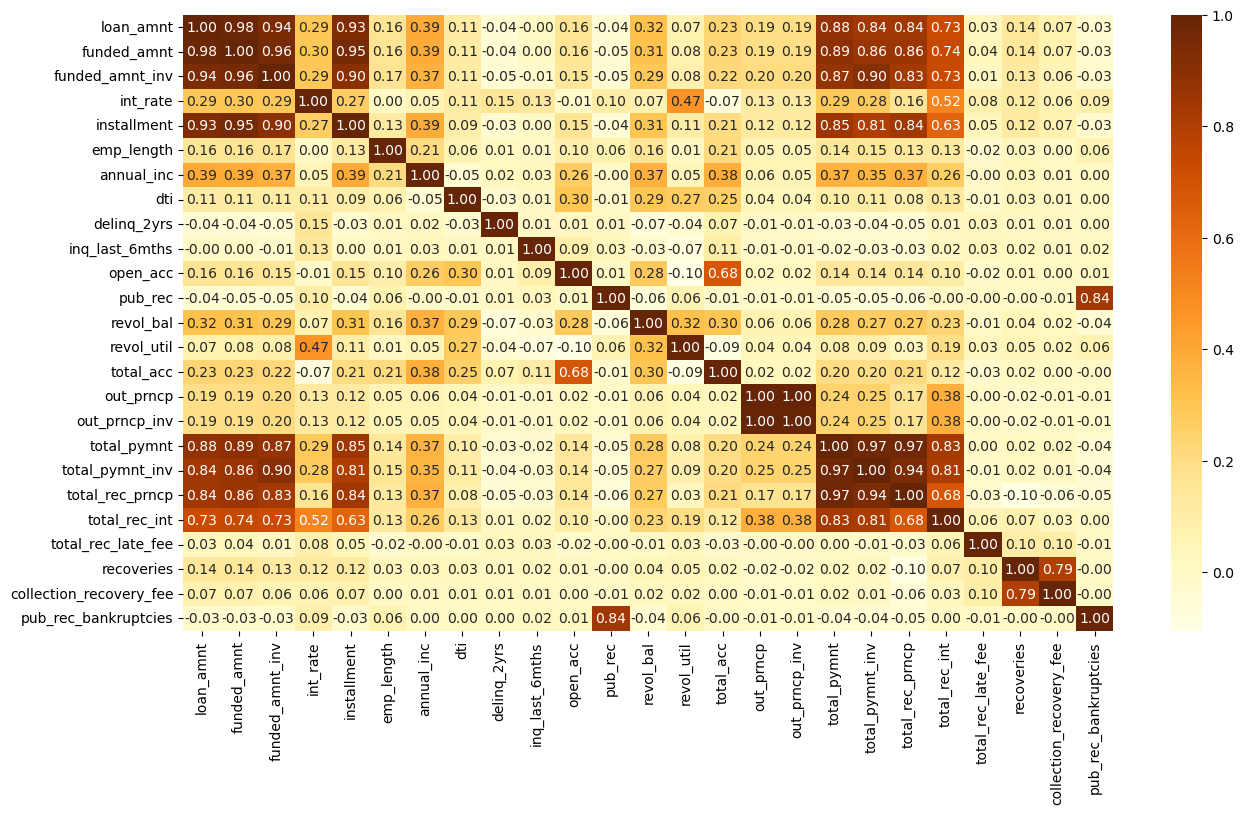

In [45]:
# Study the correlation between different numerical attributes

plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,fmt='.2f', cmap='YlOrBr')
plt.show()

#Observed loan amount, funded amount and funded investor amount are having close corelations and looking similar.
#Same applicable for payment recieved attributes (total_pymnt, total_pymnt_inv. total_rec_prncp)
#Observed public record and public record bankrupticies are having close corelations.
# Planned to analyze only loan amount. 

<function matplotlib.pyplot.show(close=None, block=None)>

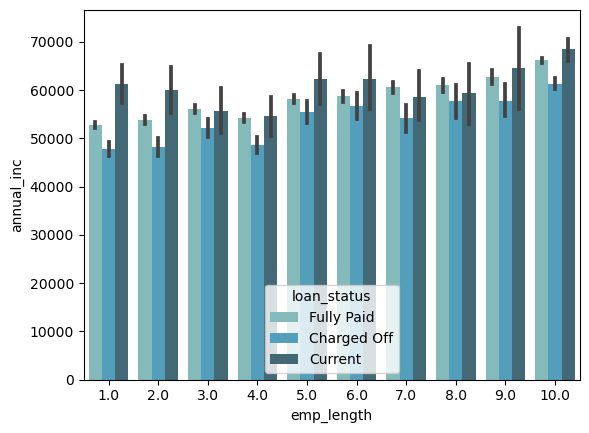

In [46]:
sns.barplot(x=df["emp_length"], y=df["annual_inc"], hue=df['loan_status'], palette='GnBu_d')
plt.show

# Observed annual income of charged off applicants are less for all the experience category.

<function matplotlib.pyplot.show(close=None, block=None)>

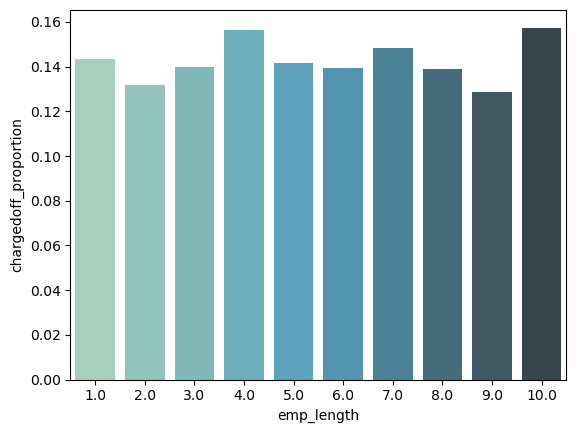

In [47]:
df14=df.groupby(['emp_length', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
df14['chargedoff_proportion']= df14['Charged Off'] / (df14['Charged Off']+df14['Fully Paid']+df14['Current'])
sns.barplot(x=df14['emp_length'], y=df14['chargedoff_proportion'], palette='GnBu_d')
plt.show

# Observed employee experience is not making much difference on finding chance of defaluters
# Observed charged off proportion is similar for all the experience categories.

#### study about other attributes against charged off category to understand defaulters using below plots

<function matplotlib.pyplot.show(close=None, block=None)>

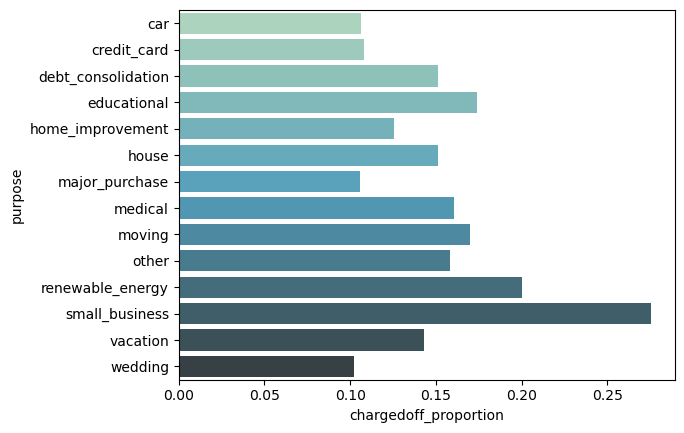

In [48]:
# purpose vs charged off proportion

df1=df.groupby(['purpose', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
df1['chargedoff_proportion']= df1['Charged Off'] / (df1['Charged Off']+df1['Fully Paid']+df1['Current'])
sns.barplot(y=df1['purpose'], x=df1['chargedoff_proportion'], palette='GnBu_d')
plt.show

# Observed charged off applications are high for following purpose of loan, considered >15% occurances.
    # samll business,newnewable energy, educational, moving and education

<function matplotlib.pyplot.show(close=None, block=None)>

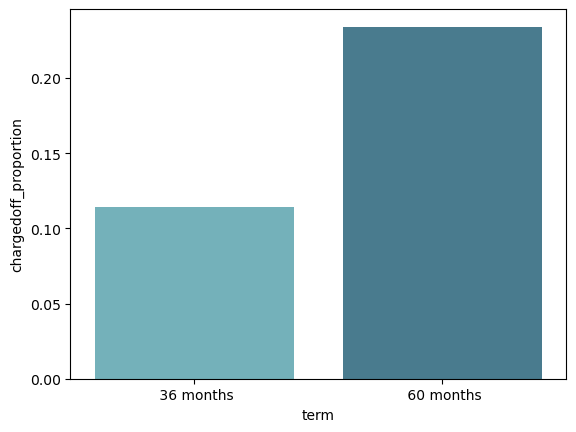

In [49]:
# Term vs charged off proportion

df2=df.groupby(['term', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
df2['chargedoff_proportion']= df2['Charged Off'] / (df2['Charged Off']+df2['Fully Paid']+df2['Current'])
sns.barplot(x=df2['term'], y=df2['chargedoff_proportion'], palette='GnBu_d')
plt.show

# Observed charged off applicants are high on long term loans

<function matplotlib.pyplot.show(close=None, block=None)>

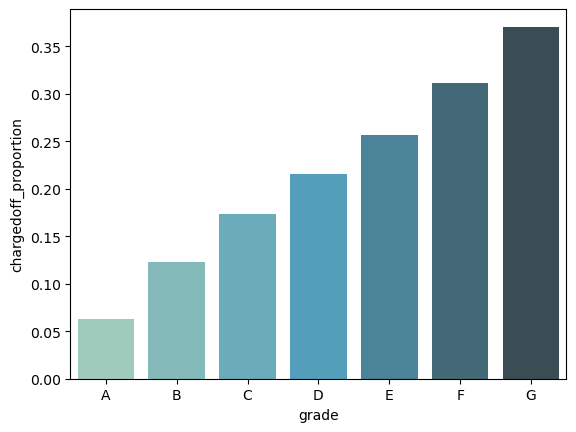

In [50]:
# Grade vs Charged off proportion

df3=df.groupby(['grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
df3['chargedoff_proportion']= df3['Charged Off'] / (df3['Charged Off']+df3['Fully Paid']+df3['Current'])
sns.barplot(x=df3['grade'], y=df3['chargedoff_proportion'], palette='GnBu_d')
plt.show

#Observed Charged off applicant counts are increasing from Grade A to G

<function matplotlib.pyplot.show(close=None, block=None)>

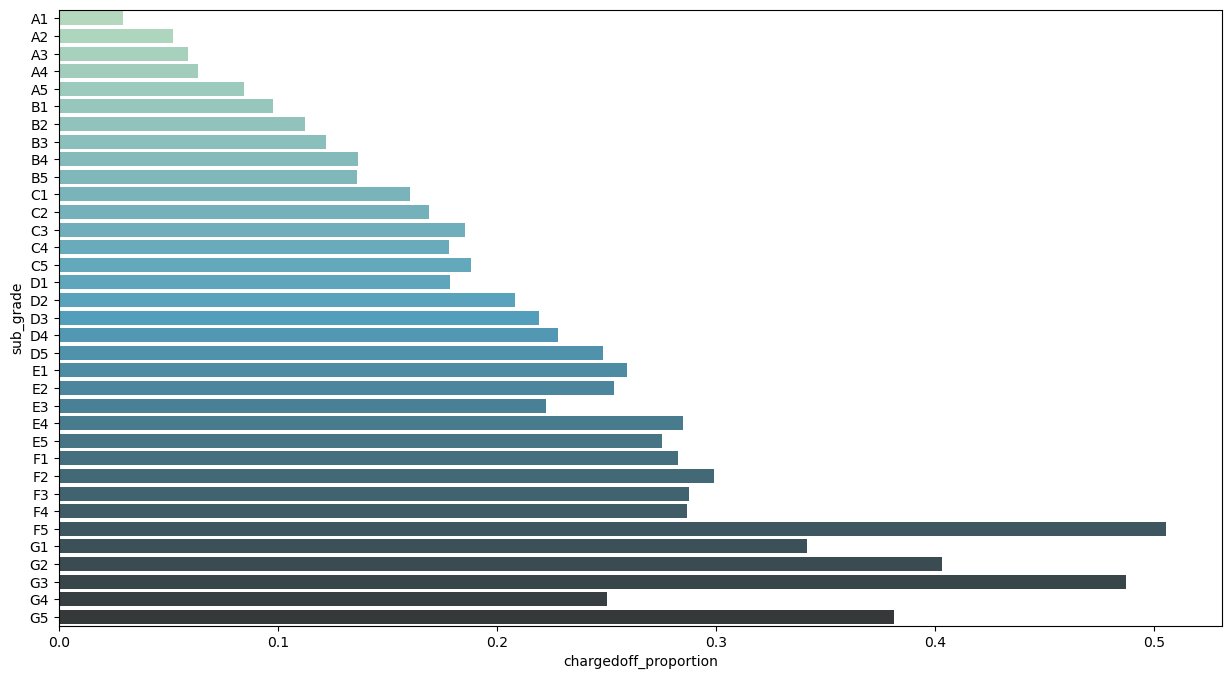

In [51]:
# Sub grade vs Charged off proportion

df4=df.groupby(['sub_grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
df4['chargedoff_proportion']= df4['Charged Off'] / (df4['Charged Off']+df4['Fully Paid']+df4['Current'])
plt.figure(figsize=(15,8))
sns.barplot(y=df4['sub_grade'], x=df4['chargedoff_proportion'], palette='GnBu_d')
plt.show

#Observed sub grade also shows the same trend of grade. 
#Charged off applicants percentage is higher in Sub grades of G and F categories, chances of getting more defaulters 

<function matplotlib.pyplot.show(close=None, block=None)>

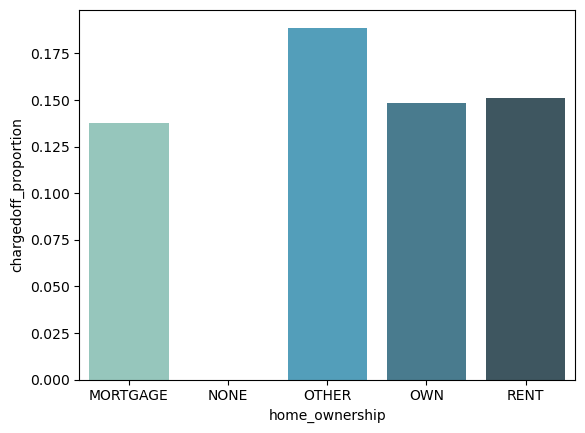

In [52]:
# Home ownership vs charged off proportion

df5=df.groupby(['home_ownership', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
df5['chargedoff_proportion']= df5['Charged Off'] / (df5['Charged Off']+df5['Fully Paid']+df5['Current'])
sns.barplot(x=df5['home_ownership'], y=df5['chargedoff_proportion'], palette='GnBu_d')
plt.show

#Observed Charged off possibilities are almost similar for all home ownerships. 
#Other category applicants has slightly higher possibility to become charged off.

<function matplotlib.pyplot.show(close=None, block=None)>

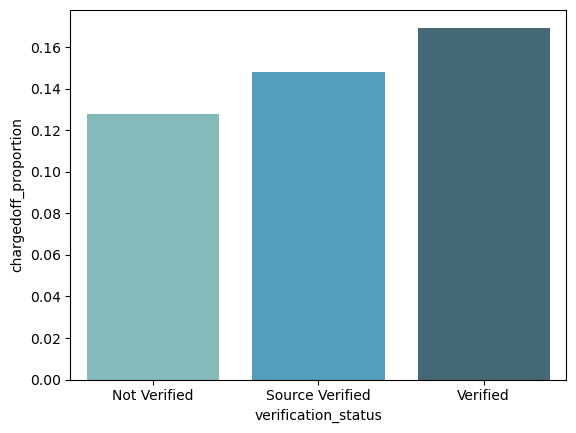

In [53]:
# Verification status vs charged off proportion

df6=df.groupby(['verification_status', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
df6['chargedoff_proportion']= df6['Charged Off'] / (df6['Charged Off']+df6['Fully Paid']+df6['Current'])
sns.barplot(x=df6['verification_status'], y=df6['chargedoff_proportion'], palette='GnBu_d')
plt.show

# Observed Verified candidates are having high chances of charged off. There is no relation for verification status

<function matplotlib.pyplot.show(close=None, block=None)>

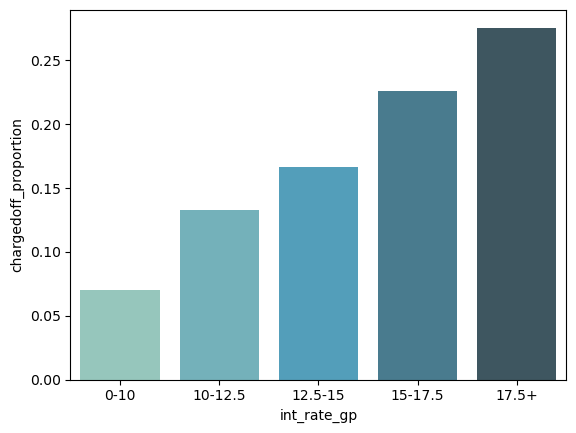

In [54]:
# Group and study the interest rate with charged off proportion

df['int_rate_gp'] = pd.cut(df['int_rate'], [0, 10, 12.5, 15, 17.5, 20], labels=['0-10', '10-12.5', '12.5-15', '15-17.5','17.5+'])
df7=df.groupby(['int_rate_gp', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
df7['chargedoff_proportion']= df7['Charged Off'] / (df7['Charged Off']+df7['Fully Paid']+df7['Current'])
sns.barplot(x=df7['int_rate_gp'], y=df7['chargedoff_proportion'], palette='GnBu_d')
plt.show

# Observed percentage of charged off applicants increases while interest rate increases.
# Observed defaulters will be more on higher interest rate

<function matplotlib.pyplot.show(close=None, block=None)>

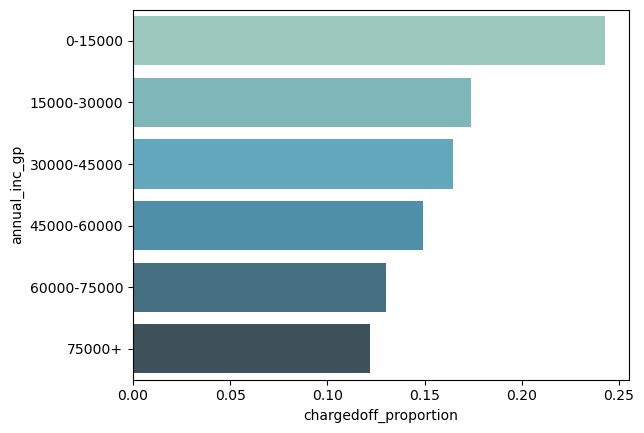

In [55]:
# Group  and study the annual income with charged off proportion

df['annual_inc_gp'] = pd.cut(df['annual_inc'], [0, 15000, 30000, 45000, 60000, 75000, 90000], labels=['0-15000', '15000-30000', '30000-45000', '45000-60000','60000-75000','75000+'])
df8=df.groupby(['annual_inc_gp', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
df8['chargedoff_proportion']= df8['Charged Off'] / (df8['Charged Off']+df8['Fully Paid']+df8['Current'])
sns.barplot(y=df8['annual_inc_gp'], x=df8['chargedoff_proportion'], palette='GnBu_d')
plt.show

# Observed charged off applicants percentage increases while annual income decreases.
# Possibility of charged off applicants are high around 15000 annual income applicants.

<function matplotlib.pyplot.show(close=None, block=None)>

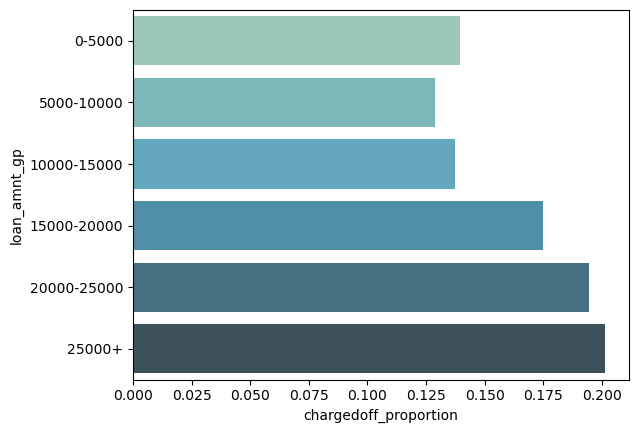

In [56]:
# Group and study the loan amount with charged off proportion

df['loan_amnt_gp'] = pd.cut(df['loan_amnt'], [0, 5000, 10000, 15000, 20000, 25000, 30000], labels=['0-5000', '5000-10000', '10000-15000', '15000-20000','20000-25000','25000+'])
df9=df.groupby(['loan_amnt_gp', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
df9['chargedoff_proportion']= df9['Charged Off'] / (df9['Charged Off']+df9['Fully Paid']+df9['Current'])
sns.barplot(y=df9['loan_amnt_gp'], x=df9['chargedoff_proportion'], palette='GnBu_d')
plt.show

# Observed number of charged of applicants increases while loan amount increses. It is directly proportional.

<function matplotlib.pyplot.show(close=None, block=None)>

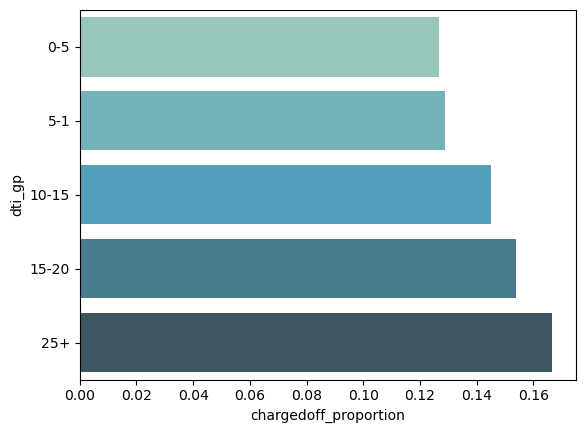

In [57]:
# Group and study the monhtly debt ratio with charged off proportion

df['dti_gp'] = pd.cut(df['dti'], [0, 5, 10, 15, 20, 25], labels=['0-5', '5-1', '10-15', '15-20','25+'])
df10=df.groupby(['dti_gp', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
df10['chargedoff_proportion']= df10['Charged Off'] / (df10['Charged Off']+df10['Fully Paid']+df10['Current'])
sns.barplot(y=df10['dti_gp'], x=df10['chargedoff_proportion'], palette='GnBu_d')
plt.show

#Observed Charged off applicants are getting increases while monthly debt payment ratio increses. 

<function matplotlib.pyplot.show(close=None, block=None)>

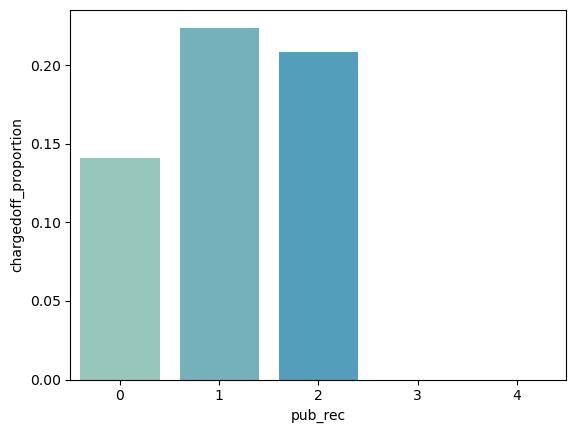

In [58]:
# Derogatory public record vs charged off proportion

df11=df.groupby(['pub_rec', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
df11['chargedoff_proportion']= df11['Charged Off'] / (df11['Charged Off']+df11['Fully Paid']+df11['Current'])
sns.barplot(x=df11['pub_rec'], y=df11['chargedoff_proportion'], palette='GnBu_d')
plt.show

#Observed there are more chances of defaulters when applicants falls under 1 and more derogatory public record

<function matplotlib.pyplot.show(close=None, block=None)>

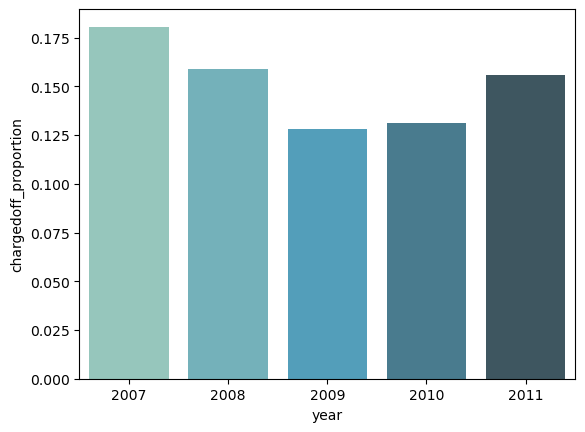

In [59]:
# create new column with issue month and date

df['issue_d']=pd.to_datetime(df['issue_d'], format='%b-%y')
df['year']=df['issue_d'].dt.year
df['month']=df['issue_d'].dt.month

# loan issue year vs charged off proportion

df12=df.groupby(['year', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
df12['chargedoff_proportion']= df12['Charged Off'] / (df12['Charged Off']+df12['Fully Paid']+df12['Current'])
sns.barplot(x=df12['year'], y=df12['chargedoff_proportion'], palette='GnBu_d')
plt.show

# Observed charged off proportions are similar between 2007 to 2011, There is no significant difference

<function matplotlib.pyplot.show(close=None, block=None)>

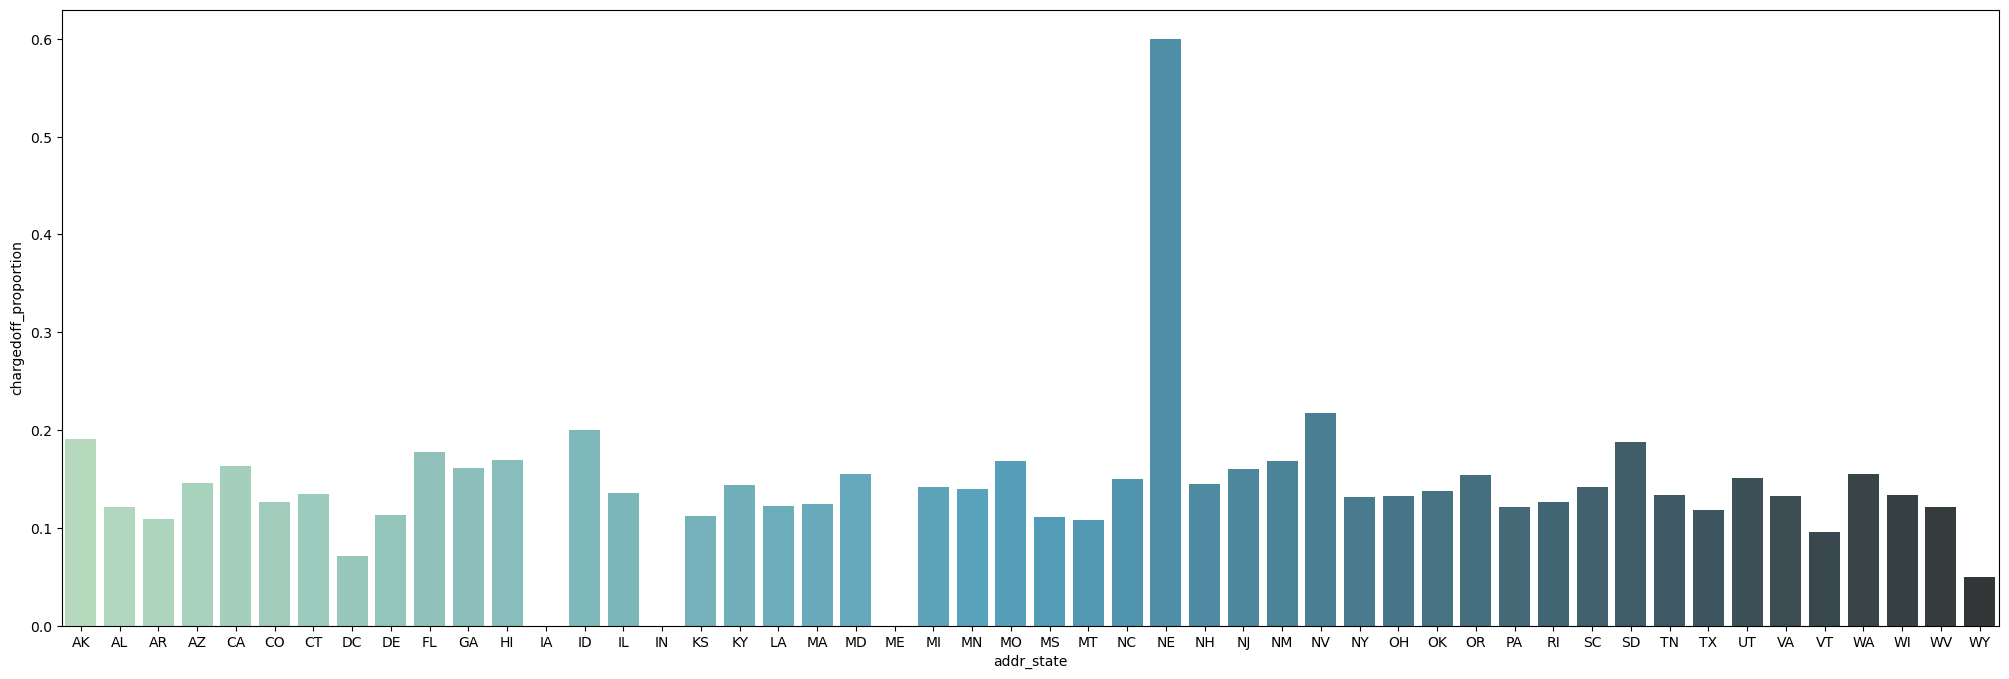

In [60]:
# State vs charged off 

df13=df.groupby(['addr_state', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
df13['chargedoff_proportion']= df13['Charged Off'] / (df13['Charged Off']+df13['Fully Paid']+df13['Current'])
plt.figure(figsize=(25,8))
sns.barplot(x=df13['addr_state'], y=df13['chargedoff_proportion'], palette='GnBu_d')
plt.show

# Observed charged off applicants are high on state 'NE'